#  Sales Analysis

Import Libraries 

In [1]:
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Read Data From Folder

Merging 12 Months data and store in a file

In [2]:
# Method 1
"""
data_jan = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv")
data_feb = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv")
data_march = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv")
data_apr = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
data_may = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv")
data_jun = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv")
data_july = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_July_2019.csv")
data_aug = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv")
data_sep = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_September_2019.csv")
data_oct = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv")
data_nov = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv")
data_dec = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv")

"""

'\ndata_jan = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv")\ndata_feb = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv")\ndata_march = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv")\ndata_apr = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")\ndata_may = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv")\ndata_jun = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv")\ndata_july = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_July_2019.csv")\ndata_aug = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sale

In [3]:
# Method 2
path = "/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"
filenames = glob.glob(path +"/*.csv")

dfs = []
for file in filenames:
    dfs.append(pd.read_csv(file))
    
data_file = pd.concat(dfs, ignore_index=True)
data_file.to_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv", index=False)

In [4]:
all_data = pd.read_csv("/home/kanik/Documents/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/all_data.csv")
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


# Clean Data and remove NAN values 

Drop Rows which contain NAN Values in it

Error_1 : ValueError: cannot convert float NaN to integer

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [6]:
all_data = all_data.dropna(how="all")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
934245,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
934246,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
934247,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
934248,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Error_2 : ValueError: invalid literal for int() with base 10: 'Or'

So Find Or to solve it

In [7]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]
temp_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


So for delete it update data like this

In [8]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


Error_3 : TypeError: can't multiply sequence by non-int of type 'str'

solution : Convert Correct Columns datatype in data

In [9]:
all_data["Quantity Ordered"]  = pd.to_numeric(all_data["Quantity Ordered"]) # Convert into int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])              # Convert into float

/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Augement Data with Additional Columns

# Add Month columns

Task 2 : Add Integer Month Column

In [10]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head(5)

/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


Task 3 : Add a Sales Column

In [11]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head(5)

/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


Task 4 : Add a city Columns

For this use pandas .aplly() method

In [12]:
"""
# Method 1
all_data["Column"] = all_data["Purchase Address"].apply(lambda x : x.split(",")[1] )
all_data.head(5)

"""

# Method 2 ; 
def get_city(address):
    return address.split(",")[1]


def get_states(address):
    return address.split(",")[2].split(" ")[1]



all_data["City"] = all_data["Purchase Address"].apply(lambda x : get_city(x) + "("+ get_states(x) + ")")
all_data.head(5)



/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City(NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas(TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City(NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas(TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle(WA)


# Q-1 : WHich was the best month for sales ? How much was earned that month?

In [13]:
results = all_data.groupby("Month").sum()["Sales"]

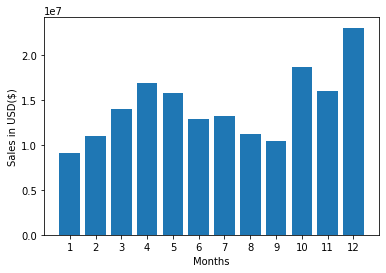

In [14]:
months = range(1,13)
plt.bar(months,results)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD($)")
plt.show()

# Q-2 : Which City  had a Highest number of sales

In [15]:
results = all_data.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta(GA),83010,1.389954e+07,523970,1.397749e+07
Austin(TX),55765,9.049368e+06,349145,9.097909e+06
Boston(MA),112640,1.818705e+07,705560,1.830821e+07
Dallas(TX),83650,1.376314e+07,523100,1.383988e+07
Los Angeles(CA),166445,2.710718e+07,1041625,2.726285e+07
New York City(NY),139660,2.317685e+07,878705,2.332159e+07
Portland(ME),13750,2.235946e+06,85720,2.248791e+06
Portland(OR),56515,9.302791e+06,353105,9.353662e+06
San Francisco(CA),251195,4.105731e+07,1577600,4.131102e+07


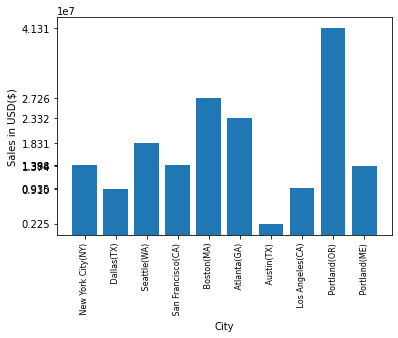

In [16]:
city = all_data["City"].unique()
plt.bar(city,results["Sales"])
plt.xticks(city,rotation="vertical",size=8)
plt.xlabel("City")
plt.yticks(results["Sales"])
plt.ylabel("Sales in USD($)")
plt.show()

Error_4 : Data and Graph are not showing same result

Reason : Name of cities are not in the same order of the cities in results variable

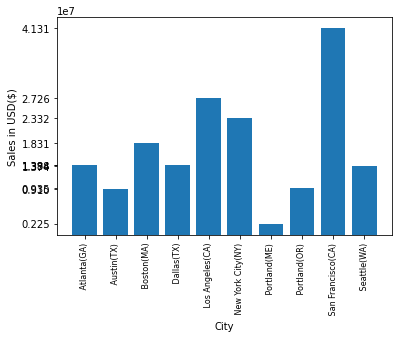

In [17]:
city = [city for city, df in all_data.groupby(["City"])]
plt.bar(city,results["Sales"])
plt.xticks(city,rotation="vertical",size=8)
plt.xlabel("City")
plt.yticks(results["Sales"])
plt.ylabel("Sales in USD($)")
plt.show()

#  Q-3 : What time should we display ads to maximize likelihood of customer's buying Product

In [18]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City(NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas(TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City(NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas(TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle(WA)


In [19]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City(NY)
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas(TX)
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City(NY)
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas(TX)
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle(WA)


In [21]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data

/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City(NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas(TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City(NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas(TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle(WA),22,55
...,...,...,...,...,...,...,...,...,...,...,...
934245,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA),20,56
934246,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA),16,0
934247,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA),7,39
934248,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA),17,30


In [22]:
all_data.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,19550,19550,19550,19550,19550,19550,19550,19550,19550,19550
1,11750,11750,11750,11750,11750,11750,11750,11750,11750,11750
2,6215,6215,6215,6215,6215,6215,6215,6215,6215,6215
3,4155,4155,4155,4155,4155,4155,4155,4155,4155,4155
4,4270,4270,4270,4270,4270,4270,4270,4270,4270,4270
5,6605,6605,6605,6605,6605,6605,6605,6605,6605,6605
6,12410,12410,12410,12410,12410,12410,12410,12410,12410,12410
7,20055,20055,20055,20055,20055,20055,20055,20055,20055,20055
8,31280,31280,31280,31280,31280,31280,31280,31280,31280,31280


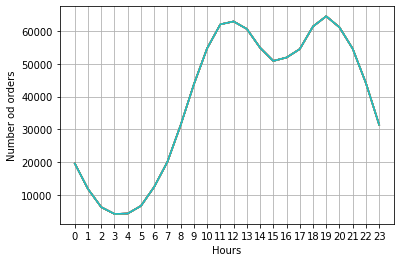

In [23]:
hour = [hour for hour, df in all_data.groupby(["Hour"])]
plt.plot(hour , all_data.groupby(["Hour"]).count())
plt.xticks(hour)
plt.xlabel("Hours")
plt.ylabel("Number od orders")
plt.grid()
plt.show()

#  Q-4 : What Product are the most often sold together? 

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City(NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas(TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City(NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas(TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle(WA),22,55


In [25]:
df = all_data.loc[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()

In [26]:
df

,Order ID,Grouped
0,194095,"Wired Headphones,Wired Headphones,Wired Headph..."
1,194096,"AA Batteries (4-pack),AA Batteries (4-pack),AA..."
2,194097,"27in FHD Monitor,27in FHD Monitor,27in FHD Mon..."
3,194098,"Wired Headphones,Wired Headphones,Wired Headph..."
4,194099,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
...,...,...
253385,259353,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
253386,259354,"iPhone,iPhone,iPhone,iPhone,iPhone"
253387,259355,"iPhone,iPhone,iPhone,iPhone,iPhone"
253388,259356,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [27]:
count = Counter()
for row in df["Grouped"] : 
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3)))
    
for key, value in count.most_common(10):
    print(key,value)

('USB-C Charging Cable', 'USB-C Charging Cable', 'USB-C Charging Cable') 223830
('Lightning Charging Cable', 'Lightning Charging Cable', 'Lightning Charging Cable') 221980
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 211210
('AA Batteries (4-pack)', 'AA Batteries (4-pack)', 'AA Batteries (4-pack)') 209270
('Wired Headphones', 'Wired Headphones', 'Wired Headphones') 192320
('Apple Airpods Headphones', 'Apple Airpods Headphones', 'Apple Airpods Headphones') 157890
('Bose SoundSport Headphones', 'Bose SoundSport Headphones', 'Bose SoundSport Headphones') 135950
('27in FHD Monitor', '27in FHD Monitor', '27in FHD Monitor') 75970
('iPhone', 'iPhone', 'iPhone') 68620
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 62800


#  Q-5 : Which Product sold the most ? Why do you think it sold the most?


In [28]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.99,New York City(NY),17,14
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas(TX),14,43
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.99,New York City(NY),11,36
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas(TX),20,40
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.98,Seattle(WA),22,55


In [29]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

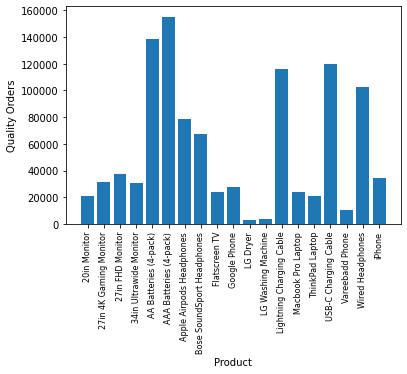

In [30]:
product = [product for product, df in product_group]
plt.bar(product,quantity_ordered)
plt.xticks(product,rotation="vertical",size=8)
plt.xlabel("Product")
plt.ylabel("Quality Orders")
plt.show()

In [31]:
prices = all_data.groupby("Product").mean()["Price Each"]
print("Prices : ", prices)

Prices :  Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


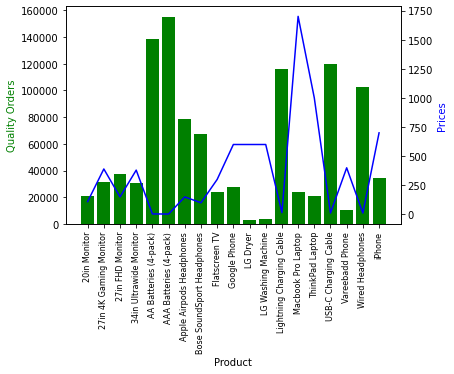

In [35]:
fig , ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product,quantity_ordered,color="g")
ax2.plot(product,prices,"b-")

ax1.set_xlabel("Product")
ax1.set_ylabel("Quality Orders", color="g" )
ax2.set_ylabel("Prices", color="b")
ax1.set_xticklabels(product,rotation="vertical",size=8)


plt.show()